Model Performance:
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00        77
        Good       1.00      1.00      1.00        34
    Moderate       1.00      1.00      1.00        55

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166


Enter the following inputs for air quality prediction:
Enter CO(GT): 0.9
Enter PT08.S1(CO): 1000
Enter NMHC(GT): 80
Enter C6H6(GT): 1500
Enter PT08.S2(NMHC): 60
Enter NOx(GT): 100
Enter PT08.S3(NOx): 1500
Enter NO2(GT): 1000
Enter PT08.S4(NO2): 15.0
Enter PT08.S5(O3): 45.0
Enter T: 15.0
Enter RH: 45.0
Enter AH: 0.7578

The predicted air quality is: Good

Do you want to sort rows with 'Good' air quality? (yes/no): yes

Sorting rows with 'Good' air quality.
You can specify a feature to sort by (e.g., CO(GT), T, RH).
Enter the feature to sort by: RH

Sorted rows with 'Good' air quality by RH:
  

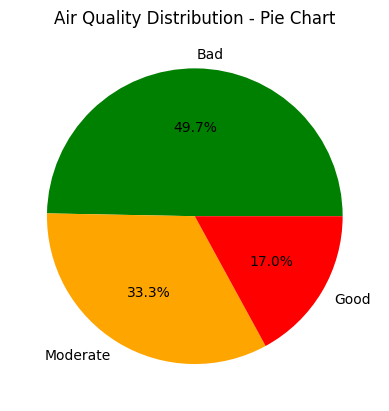

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
file_path = "/content/AirQualityUCI.xlsx"  # Update with your file path
data = pd.read_excel(file_path, sheet_name="AirQualityUCI")

# Preprocessing
cleaned_data = data.replace(-200, pd.NA).dropna()
cleaned_data["AirQuality"] = pd.cut(cleaned_data["CO(GT)"],
                                    bins=[-float("inf"), 1.0, 2.0, float("inf")],
                                    labels=["Good", "Moderate", "Bad"])

features = ["CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)",
            "PT08.S2(NMHC)", "NOx(GT)", "PT08.S3(NOx)", "NO2(GT)",
            "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]
X = cleaned_data[features]
y = cleaned_data["AirQuality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Performance:")
print(classification_report(y_test, y_pred))

# Function to display a chart
def display_chart():
    print("\nSelect the chart type to display:")
    print("1. Bar Chart")
    print("2. Line Chart")
    print("3. Pie Chart")
    chart_choice = input("Enter your choice (1/2/3): ").strip()

    air_quality_counts = cleaned_data["AirQuality"].value_counts()

    if chart_choice == "1":
        air_quality_counts.plot(kind="bar", color=["green", "orange", "red"])
        plt.title("Air Quality Distribution - Bar Chart")
        plt.xlabel("Air Quality")
        plt.ylabel("Count")
    elif chart_choice == "2":
        air_quality_counts.plot(kind="line", marker="o", color="blue")
        plt.title("Air Quality Distribution - Line Chart")
        plt.xlabel("Air Quality")
        plt.ylabel("Count")
    elif chart_choice == "3":
        air_quality_counts.plot(kind="pie", autopct="%1.1f%%", colors=["green", "orange", "red"])
        plt.title("Air Quality Distribution - Pie Chart")
        plt.ylabel("")  # Hide y-axis label for pie chart
    else:
        print("Invalid choice. Please select a valid chart type.")
        return

    plt.show()

# Function to sort and display good quality air rows
def sort_good_quality():
    print("\nSorting rows with 'Good' air quality.")
    print("You can specify a feature to sort by (e.g., CO(GT), T, RH).")
    sort_column = input("Enter the feature to sort by: ").strip()

    if sort_column not in features:
        print(f"Invalid feature name: {sort_column}. Please choose from {features}.")
        return

    good_quality_data = cleaned_data[cleaned_data["AirQuality"] == "Good"]
    if good_quality_data.empty:
        print("No rows with 'Good' air quality found.")
        return

    sorted_data = good_quality_data.sort_values(by=sort_column)

    print(f"\nSorted rows with 'Good' air quality by {sort_column}:")
    print(sorted_data)
    save_choice = input("Do you want to save the sorted data to a file? (yes/no): ").strip().lower()
    if save_choice == "yes":
        sorted_data.to_csv("sorted_good_quality.csv", index=False)
        print("Sorted data saved as 'sorted_good_quality.csv'.")

# Function to predict air quality
def predict_air_quality():
    while True:
        print("\nEnter the following inputs for air quality prediction:")
        user_input = []
        for feature in features:
            value = float(input(f"Enter {feature}: "))
            user_input.append(value)

        user_input_df = pd.DataFrame([user_input], columns=features)
        prediction = model.predict(user_input_df)
        print(f"\nThe predicted air quality is: {prediction[0]}")

        if prediction[0] == "Good":
            sort_choice = input("\nDo you want to sort rows with 'Good' air quality? (yes/no): ").strip().lower()
            if sort_choice == "yes":
                sort_good_quality()

        chart_choice = input("\nDo you want to display a chart? (yes/no): ").strip().lower()
        if chart_choice == "yes":
            display_chart()

        continue_choice = input("\nDo you want to make another prediction? (yes to continue, no to exit): ").strip().lower()
        if continue_choice == "no":
            print("Exiting the program. Goodbye!")
            break

# Call the prediction function
predict_air_quality()